## Load Data from CSVs

In [2]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')

daily_engagement = read_csv('daily_engagement.csv')

project_submissions = read_csv('project_submissions.csv')

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

In [4]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [5]:
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [6]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Fixing Data Types

In [7]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [8]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [9]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [10]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

# takes every record of 'acct' in 'daily_engagement' and
# renames the data 'account_key'. last, it deletes all instances
# of 'acct' in 'daily_engagement'

### moved above get_unique_students() to effect re-name daily_engagement data

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del(engagement_record['acct'])

In [11]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [12]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

len(enrollments)

1640

In [13]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [14]:
### code no longer useful because a function was created for this code
### see above get_unique_students(dataset)

# unique_enrolled_students = set()
# for enrollment in enrollments:
#     unique_enrolled_students.add(enrollment['account_key'])
# len(unique_enrolled_students)

In [15]:
len(daily_engagement)

136240

In [16]:
unique_engaged_students = get_unique_students(daily_engagement)
len(unique_engaged_students)

1237

In [17]:
# answer for command 3

daily_engagement[0]['account_key']

u'0'

In [18]:
### code no longer useful because a function was created for this code
### see above get_unique_students(dataset)

#unique_engaged_students = set()
#for engagements in daily_engagement:
#    unique_engaged_students.add(engagements['account_key'])
#len(unique_engaged_students)

In [19]:
len(project_submissions)

3642

In [20]:
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

In [21]:
### code no longer useful because a function was created for this code
### see above get_unique_students(dataset)

# unique_submitted_students = set()
# for submissions in project_submissions:
#    unique_submitted_students.add(submissions['account_key'])
# len(unique_submitted_students)

## Problems in the Data

## Missing Engagement Records

In [22]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engaged_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [23]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

count = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    cancel_date = enrollment['days_to_cancel']
    if student not in unique_engaged_students \
            and (cancel_date > 0 or cancel_date == None):
        count = count + 1
        print enrollment

count

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

## Tracking Down the Remaining Problems

In [24]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [25]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [26]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print non_udacity_enrollments[2]
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'429', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
135656
3634


## Refining the Question

In [27]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if (enrollment['is_canceled'] == False or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
        
len(paid_students)

995

In [28]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [29]:
### Added code for exercise 10

for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [30]:
### Added code for exercise 12
### Finding insights between those who pass projects and those who don't
### First, I am creating minutes visited/lessons completed

for engagement_record in paid_engagement:
    if engagement_record['lessons_completed'] > 0:
        engagement_record['minutes_per_lesson'] = \
                engagement_record['total_minutes_visited']/engagement_record['lessons_completed']
    else:
        engagement_record['minutes_per_lesson'] = 0

## Getting Data from First Week

In [31]:
#####################################
#                 7                 #
#####################################

# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [32]:
# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [33]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
    
print engagement_for_student

[{u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 21.8645383334, 'minutes_per_lesson': 0, u'projects_completed': 0, 'account_key': u'479', u'utc_date': datetime.datetime(2015, 5, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 19.7561205, 'minutes_per_lesson': 0, u'projects_completed': 0, 'account_key': u'479', u'utc_date': datetime.datetime(2015, 5, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 51.272002, 'minutes_per_lesson': 0, u'projects_completed': 0, 'account_key': u'479', u'utc_date': datetime.datetime(2015, 5, 11, 0, 0)}, {u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 98.7683608333, 'minutes_per_lesson': 49.38418041665, u'projects_completed': 0, 'account_key': u'479', u'utc_date': datetime.datetime(2015, 5, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_vi

In [34]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [35]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.


# print total_minutes_by_account
# print total_minutes_by_account.values()
# print engagement_by_account['1200']
# print total_minutes_by_account['1200']

student_with_max_minutes = None
max_minutes = 0

for account_key, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = account_key

max_minutes

3564.7332644989997

In [36]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, 'minutes_per_lesson': 212.6298349165, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, 'minutes_per_lesson': 145.43898722233334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, 'minutes_per_lesson': 129.503150611, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, 'minutes_per_lesson': 147.284387, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'le

## Lessons Completed in First Week

In [37]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
#print engagement_by_account

In [38]:
## need to create a dictionary of account_key and lessons_completed during the first week
## or modify above code to run lessons_completed

## engagement_by_account holds account key and dictionary for that account_key

## create function to make new dictionary for any engagement data
## create_total_engagement_dictionary needs string input

def sum_grouped_items(grouped_data, field_name):
    empty_dictionary = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        empty_dictionary[key] = total
    return empty_dictionary

total_lessons_completed = sum_grouped_items(engagement_by_account, 'lessons_completed')  
print total_lessons_completed
#print total_lessons_completed.values()

{u'619': 6, u'1140': 1, u'669': 0, u'428': 2, u'344': 4, u'0': 1, u'346': 1, u'347': 3, u'340': 1, u'341': 0, u'342': 0, u'343': 0, u'811': 9, u'812': 20, u'348': 0, u'349': 1, u'816': 0, u'918': 0, u'1149': 3, u'719': 0, u'718': 0, u'715': 1, u'426': 0, u'713': 0, u'712': 0, u'710': 0, u'661': 0, u'129': 1, u'660': 0, u'422': 2, u'1060': 1, u'1062': 0, u'1067': 0, u'1066': 0, u'671': 0, u'427': 3, u'298': 1, u'299': 0, u'296': 0, u'297': 2, u'294': 2, u'295': 2, u'292': 0, u'293': 4, u'290': 3, u'291': 0, u'591': 0, u'590': 0, u'593': 0, u'592': 1, u'595': 2, u'594': 0, u'597': 6, u'596': 4, u'195': 4, u'194': 1, u'197': 9, u'196': 1, u'191': 0, u'190': 0, u'193': 0, u'192': 4, u'270': 9, u'271': 5, u'272': 8, u'273': 0, u'274': 6, u'275': 0, u'276': 3, u'277': 2, u'278': 0, u'279': 0, u'497': 1, u'524': 0, u'525': 0, u'526': 18, u'527': 0, u'520': 0, u'521': 1, u'522': 0, u'523': 0, u'1014': 10, u'1015': 0, u'528': 3, u'529': 0, u'1013': 0, u'1235': 1, u'449': 0, u'1231': 8, u'443': 

In [39]:
# analyzing lessons completed using numpy library

# %pylab inline
# import matplotlib.pyplot as plt

import numpy as np

def describe_data(data):
    print "Mean:", np.mean(data)
    print "Standard Deviation:", np.std(data)
    print "Minimum:", np.min(data)
    print "Maximum:", np.max(data)
    #plt.hist(data)
    
total_lessons = total_lessons_completed.values()
describe_data(total_lessons)

Mean: 1.63618090452
Standard Deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [40]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
num_days_visited = days_visited_by_account.values()
describe_data(num_days_visited)

Mean: 2.86733668342
Standard Deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [41]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and \
            (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])

#len(pass_subway_project)

In [42]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print passing_engagement
#len(non_passing_engagement)

[{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, 'minutes_per_lesson': 0, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 37.2848873333, 'minutes_per_lesson': 0, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 53.6337463333, 'minutes_per_lesson': 0, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 33.4892696667, 'minutes_per_lesson': 0, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_v

In [43]:
## Comparing the Two Student Groups

In [44]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# Summarizes the data about minutes spent per successful project

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

non-passing students:
Mean: 143.326474267
Standard Deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
Populating the interactive namespace from numpy and matplotlib


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

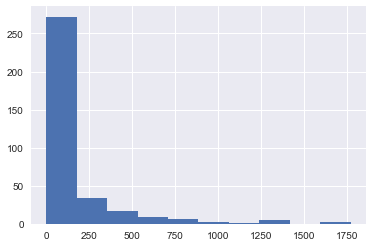

In [45]:
print "non-passing students:"
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())

%pylab inline
import matplotlib.pyplot as plt
plt.hist(non_passing_minutes.values())

******
passing students:
Mean: 394.586046484
Standard Deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Populating the interactive namespace from numpy and matplotlib


(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

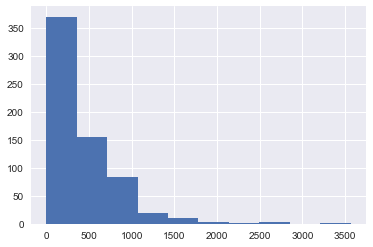

In [46]:
print "******"

print "passing students:"
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())

%pylab inline
import matplotlib.pyplot as plt
plt.hist(passing_minutes.values())

non-passing students:
Mean: 0.862068965517
Standard Deviation: 2.54915994183
Minimum: 0
Maximum: 27
Populating the interactive namespace from numpy and matplotlib


(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

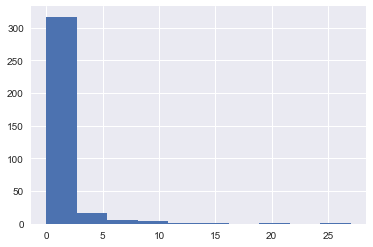

In [47]:
print "non-passing students:"
non_passing_lessons_completed = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons_completed.values())


%pylab inline
import matplotlib.pyplot as plt
plt.hist(non_passing_lessons_completed.values())

******
passing students:
Mean: 2.05255023184
Standard Deviation: 3.14222705558
Minimum: 0
Maximum: 36
Populating the interactive namespace from numpy and matplotlib


(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

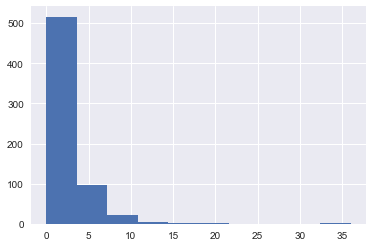

In [48]:
print "******"

print "passing students:"
passing_lessons_completed = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons_completed.values())

%pylab inline
import matplotlib.pyplot as plt
plt.hist(passing_lessons_completed.values())

non-passing students:
Mean: 1.90517241379
Standard Deviation: 1.90573144136
Minimum: 0
Maximum: 7
Populating the interactive namespace from numpy and matplotlib


(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

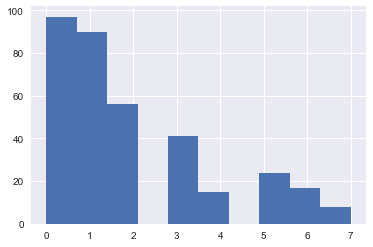

In [49]:
print "non-passing students:"
non_passing_days_visited = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_days_visited.values())

%pylab inline
import matplotlib.pyplot as plt
plt.hist(non_passing_days_visited.values())

******
passing students:
Mean: 3.38485316847
Standard Deviation: 2.25882147092
Minimum: 0
Maximum: 7
Populating the interactive namespace from numpy and matplotlib


(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

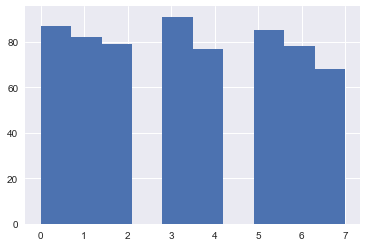

In [50]:
print "******"

print "passing students:"
passing_days_visited = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(passing_days_visited.values())

%pylab inline
import matplotlib.pyplot as plt
plt.hist(passing_days_visited.values())

non-passing students:
Mean: 0.0
Standard Deviation: 0.0
Minimum: 0
Maximum: 0
Populating the interactive namespace from numpy and matplotlib


(array([   0.,    0.,    0.,    0.,    0.,  348.,    0.,    0.,    0.,    0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

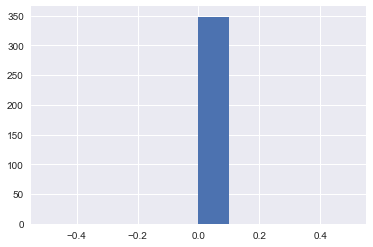

In [51]:
### Created a new metric to measure student's performance
### minutes/lesson completed = average amount of time per lesson

print "non-passing students:"
non_passing_projects_completed = sum_grouped_items(non_passing_engagement_by_account, 'projects_completed')
describe_data(non_passing_projects_completed.values())

%pylab inline
import matplotlib.pyplot as plt
plt.hist(non_passing_projects_completed.values())

******
passing students:
Mean: 0.00927357032457
Standard Deviation: 0.110809572358
Minimum: 0
Maximum: 2
Populating the interactive namespace from numpy and matplotlib


(array([ 642.,    0.,    0.,    0.,    0.,    4.,    0.,    0.,    0.,    1.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

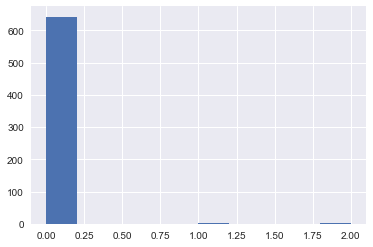

In [52]:
print "******"

print "passing students:"
passing_projects_completed = sum_grouped_items(passing_engagement_by_account, 'projects_completed')
describe_data(passing_projects_completed.values())

%pylab inline
import matplotlib.pyplot as plt
plt.hist(passing_projects_completed.values())

## Making Histograms

In [53]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

## See implementation of histogram in answers above
## To use plt.hist(data) in the future, use modified code below to describe data


%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def describe_data_plot(data):
    print "Mean:", np.mean(data)
    print "Standard Deviation:", np.std(data)
    print "Minimum:", np.min(data)
    print "Maximum:", np.max(data)
    plt.hist(data, bins=1)
    plt.title(data)

Populating the interactive namespace from numpy and matplotlib


Mean: 3.38485316847
Standard Deviation: 2.25882147092
Minimum: 0
Maximum: 7


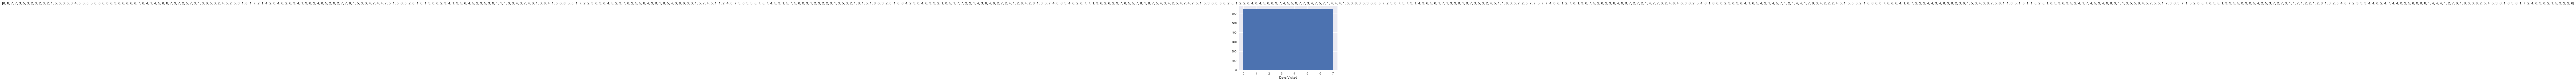

In [54]:
describe_data_plot(passing_days_visited.values())
plt.xlabel('Days Visited')

## Improving Plots and Sharing Findings

passing students:
Mean: 394.586046484
Standard Deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Populating the interactive namespace from numpy and matplotlib


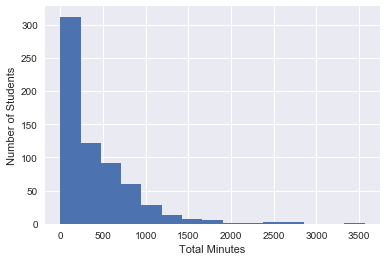

In [55]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

print "passing students:"
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())

%pylab inline
import matplotlib.pyplot as plt
plt.hist(passing_minutes.values(), bins=15)
plt.xlabel("Total Minutes")
plt.ylabel("Number of Students")